In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [58]:
x = [22, 18, 14, 30, 15, 13, 8, 12, 20, 27, 5, 19, 28, 3, 17]
y = [6, 4, 11, 10, 8, 13, 5, 18, 22, 9, 2, 16, 12, 3, 7]

In [59]:
def calcularCorrelacao(x, y):
    corr, _ = pearsonr(x, y)
    return corr

def calcularRegressao(x, y):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    modelo = LinearRegression()
    modelo.fit(x, y)
    
    a = modelo.intercept_
    b = modelo.coef_[0]
    
    return a, b, modelo

In [60]:
def gerarScatterPlot(x, y, modelo):
    plt.scatter(x, y, color='blue', label='Dados')
    plt.plot(x, modelo.predict(np.array(x).reshape(-1, 1)), color='red', label='Linha de Regressão')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [61]:
def gerarEstatisticas(x, y):
    correlacao = calcularCorrelacao(x, y)
    print(f"Coeficiente de correlação: {correlacao:.2f}")

    a, b, modelo = calcularRegressao(x, y)
    print(f"Coeficiente a (intercepto): {a:.2f}")
    print(f"Coeficiente b (inclinação): {b:.2f}")

    return modelo

Coeficiente de correlação: 0.34
Coeficiente a (intercepto): 5.64
Coeficiente b (inclinação): 0.24


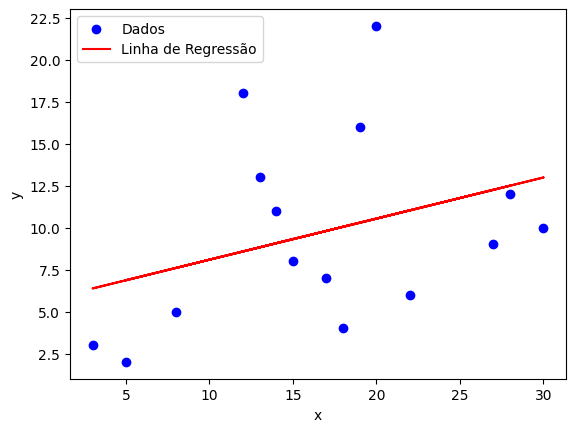

In [62]:
modelo = gerarEstatisticas(x, y)
gerarScatterPlot(x, y, modelo)

In [63]:
def calcularSomatorias(x, y):
    somaX = sum(x)
    somaY = sum(y)
    somaXY = sum([x * y for x, y in zip(x, y)])
    somaX2 = sum([x**2 for x in x])
    somaY2 = sum([y**2 for y in y])
    
    return somaX, somaY, somaXY, somaX2, somaY2

def calcularCoeficientes(x, y):
    somaX, somaY, somaXY, somaX2, somaY2 = calcularSomatorias(x, y)
    n = len(x)
    
    a = (n * somaXY - somaX * somaY) / (n * somaX2 - somaX**2)
    b = (somaY - a * somaX) / n
    
    return a, b

Coeficiente a (manual): 0.24
Coeficiente b (manual): 5.64


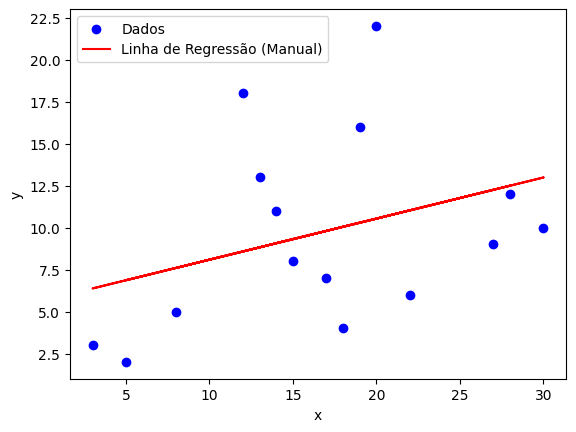

In [64]:
a_manual, b_manual = calcularCoeficientes(x, y)
print(f"Coeficiente a (manual): {a_manual:.2f}")
print(f"Coeficiente b (manual): {b_manual:.2f}")

# Predição manual
y_pred_manual = b_manual + a_manual * np.array(x)

# %%
# Visualização manual
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, y_pred_manual, color='red', label='Linha de Regressão (Manual)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()